# Sentiment Analysis and Suggestion
We will be performing a sentiment analysis about SIA using Twitter posts and from there, make suggestions for improvement.

### How to run?:
1. Download `SIA_AppChallenge_Final.ipynb`, `openAIRes.txt` and `sia_tweets.json`. Ensure that all these files are in the same directory. <br>**You can find the files from the GitHub Repo: https://github.com/ong-zijian/SIAAppChallenge**
2. We recommend using Jupyter Notebook or any other notebook program that are local as you would have to import the other 2 files.
3. Run the cells from the first to the end.
4. Skip those that are optional as they require API keys. If you have the API keys for the product, you may insert your API keys to test them out. These components have been previously generated by us and you can just import the files into the notebook with the codes we provided.

## 1. Scrap Twitter for SIA Sentiments (Optional)
We used the scraperapi to scrape Tweets for the query text.

As the api is a free tier with limited access, use the generated JSON before re-running and only run when there is a need for it.
<br><br>

**You do not need to run the codes as it requires an API Key. This is to demonstrate how we obtain the results**

In [ ]:
import requests
import pandas as pd

In [ ]:
twitter_data = []

payload = {
   'api_key': '<add your api key here>',
   'query': 'singapore airline',
   'num': '100'
}

In [ ]:
response = requests.get(
   'https://api.scraperapi.com/structured/twitter/search', params=payload)
data = response.json()

In [ ]:
all_tweets = data['tweets']
for tweet in all_tweets:
   twitter_data.append({
       'ID': tweet['tweet_id'],
       'User': tweet["user"],
       'Tweet': tweet["text"],
       'URL': tweet["link"]
   })

In [ ]:
df = pd.DataFrame(twitter_data)
df.to_json('sia_tweets.json', orient='index')
print('Tweets exported to JSON')

## 2. Convert JSON to python list
The tweets are now in a json file. We will read it and turn them into a python list for us to use.

In [ ]:
import json

In [ ]:
with open('sia_tweets.json', 'r') as file:
    data = json.load(file)

In [ ]:
tweet_texts = []

for tweet_id, tweet_data in data.items():
    text = tweet_data['Tweet']
    tweet_texts.append(text)

In [ ]:
import re

# Cleaned output list
cleaned_output = []

# Regex pattern to remove unwanted characters
pattern = r"[\n\xa0]"

for item in tweet_texts:
    # Remove unwanted characters using regex
    cleaned_item = re.sub(pattern, "", item)
    cleaned_output.append(cleaned_item)

# Print the cleaned output
for item in cleaned_output:
    print(item)

Jan 21, 2023 — Personally had one of the worst travelling experience with Singapore airline. The feedback and customer service team had made no efforts and...
Nov 20, 2022 — Singapore Airlines will broadcast live matches on board selected flights. Simply navigate to. @sport24live. on Live TV in KrisWorld to cheer...
Hi there, may we clarify which Singapore Airlines' email address you have reached out to, when you were last in touch with our colleagues and what was...
Trying to claim a refund for my tickets but my agent says they are none refundable and Singapore air are not giving refunds??? 2. Singapore Airlines.
Singapore Airlines · @SingaporeAir. Explore our newly added inflight entertainment offerings on board – from specially curated content for Father's Day to...
Jul 9, 2022 — Hi there, the Miles and Points conversion programme between Singapore Airlines and Virgin Australia is currently suspended. We will look to...
Hi there, may we clarify which Singapore Airlines' email addres

## 3. Sentiment Analysis
We are doing a simple sentiment analysis using TextBlob to get the score from -1 to 1

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
sentiments = []

for text in cleaned_output:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

In [ ]:
print(sentiments)

[-0.5, 0.0909090909090909, 0.0, 0.0, 0.24675324675324675, 0.0, 0.0, -0.6024999999999999, 0.0, 0.5, 0.0, 0.65, 0.11818181818181818, -0.19, 0.0, 0.0, 0.0, -0.175, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.19318181818181818, 0.0, 0.0, 0.21153846153846154, 0.75, 0.0, 0.13636363636363635, -0.5, 0.0, 0.0, 0.0, -0.3, -0.19999999999999996, 0.1, 0.0, 0.0, -0.19999999999999996, 0.0, 0.0, 0.125, 0.5, 0.0, 0.0, -0.125, 0.0, -0.03333333333333334, -0.1, 0.0, 0.1, -0.4, 0.0, -0.5, 0.0, 0.0, 0.13636363636363635, 0.0, 0.375, -0.5, 0.0, -0.1, 0.0, -0.0625, -0.390625, 0.4681818181818182, 0.7, 0.0, 0.0, 0.0, 0.0, -0.19999999999999996, 0.0, 0.0, 0.06818181818181818, 0.0, 0.0, 0.0, 0.0, 0.3958333333333333, -0.1, 0.0, -0.2, 0.0, 0.0, 0.0, 0.24000000000000002, 0.4125, 0.0, 0.2, 0.0]


From here, we will do a simple step to filter out only the negative sentiments, from -1 to -0.1 to prune the data.

In [ ]:
negative = []
negative_sentiment = []
for i in range(len(sentiments)):
    if sentiments[i] < -0.1:
        negative.append(cleaned_output[i])
        negative_sentiment.append(sentiments[i])

We will now plot the sentiments to take a look

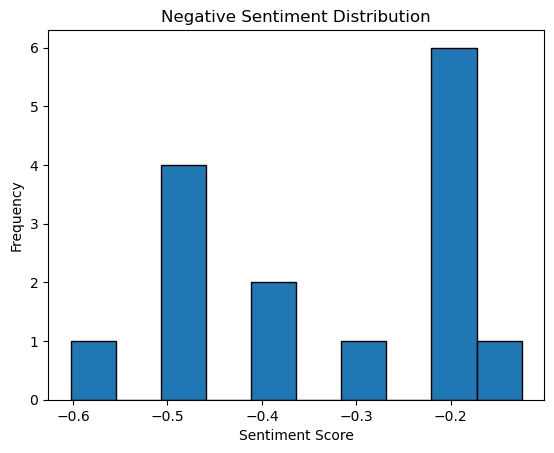

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Plotting the histogram
plt.hist(negative_sentiment, edgecolor='black')

# Labeling the chart
plt.title('Negative Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Save the chart
plt.savefig('sentiment_analysis_chart.png')

# Displaying the chart
plt.show()


## 4. Word Cloud
We will be using the wordcloud library to generate the word cloud.


In [ ]:
!pip install wordcloud

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

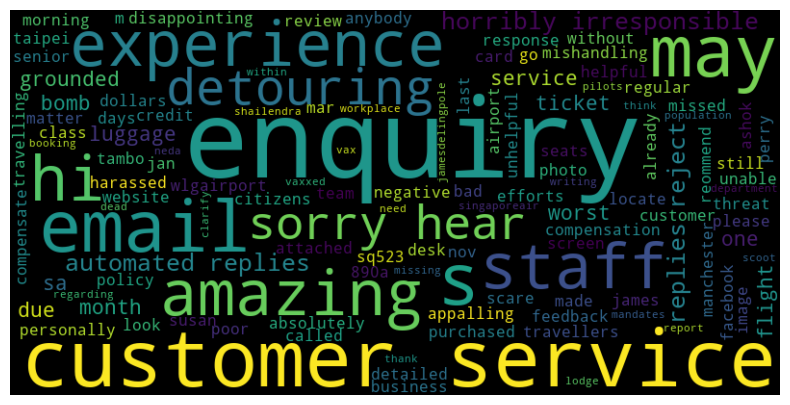

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

combined_text = ' '.join(negative)
tokens = word_tokenize(combined_text)

# Define the set of common words to exclude
common_words = set(['and', 'the', 'with', 'to', 'on', 'had', 'no', 'Singapore', 'singapore', 'airline', 'airlines'])

# Remove common words and convert tokens to lowercase
filtered_tokens = [token.lower() for token in tokens if token.lower() not in common_words]

# Join the filtered tokens back into a string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("wordcloud.png")
plt.show()

## 5. AI Model
We will now use some LLMs and QA model to generate suggestions.

In [ ]:
!pip install transformers

### 5.1. Pipeline
We will be using Huggingface Transformer Pipeline. library to generate the issues from the given complains.

HuggingFace libraries are free to use, which offloads away some of the cost from using OpenAI.

In [ ]:
from transformers import pipeline

# Load the question answering pipeline
qa_pipeline = pipeline("question-answering")

# Provide the context and question

question = "What is the issue in these tweets?"

pipelineRes = []

for tweet in negative:
    # Get the answer using the pipeline
    answer = qa_pipeline(question=question, context=tweet)
    pipelineRes.append(answer)

# Print the answer
print(pipelineRes)


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.22675573825836182, 'start': 93, 'end': 151, 'answer': 'The feedback and customer service team had made no efforts'}, {'score': 0.039056289941072464, 'start': 62, 'end': 76, 'answer': 'luggage missed'}, {'score': 0.13449782133102417, 'start': 0, 'end': 39, 'answer': 'Singapore Airline is very disappointing'}, {'score': 0.1989353448152542, 'start': 109, 'end': 128, 'answer': 'harassed by Susan -'}, {'score': 0.2392457127571106, 'start': 75, 'end': 108, 'answer': 'Unable to locate on their website'}, {'score': 0.3984605371952057, 'start': 62, 'end': 104, 'answer': 'negative experience with Singapore airline'}, {'score': 0.07094573974609375, 'start': 0, 'end': 62, 'answer': "Singapore Airline's customer service is horribly irresponsible"}, {'score': 0.07094573974609375, 'start': 0, 'end': 62, 'answer': "Singapore Airline's customer service is horribly irresponsible"}, {'score': 0.8890637159347534, 'start': 61, 'end': 71, 'answer': 'bomb scare'}, {'score': 0.6075602769851685, '

In [ ]:
pipelineResArr = []
for i in pipelineRes:
    pipelineResArr.append(i['answer'])
print(pipelineResArr)

['The feedback and customer service team had made no efforts', 'luggage missed', 'Singapore Airline is very disappointing', 'harassed by Susan -', 'Unable to locate on their website', 'negative experience with Singapore airline', "Singapore Airline's customer service is horribly irresponsible", "Singapore Airline's customer service is horribly irresponsible", 'bomb scare', 'Poor customer', 'the matter', 'a booking with Scoot or with Singapore Airlines', 'Singapore Airline 4 pilots dead', "Singapore Airline's customer service is horribly irresponsible", "It's been a month I have been both writing emails"]


### 5.2. OpenAI (Optional)
We use OpenAI API to generate suggestions. If you do not wish to run the api call with your own key, you may load the pre-generated results from the codes in the following cell.

We are using OpenAI as their LLM is generally one of the more powerful models out there that could truly generate qualitative answers.

**You do not need to run the codes as it requires an API Key. We will provide the responses that we generated. This is to demonstrate how we obtain the results**

In [ ]:
import openai

# Set up OpenAI API credentials
openai.api_key = '<api-key>'

# Generate improvement suggestions using OpenAI GPT-3
def generate_suggestions(tweets):
    prompt = "Based on this context, can you identify the few most common gap Singapore Airlines faces, give the number of times it appears in a bracket and support your answer by giving a simple quote from the context as well?"

    for tweet in tweets:
        prompt += "- " + tweet + "\n"

    response = openai.Completion.create(
        engine='text-davinci-003',
        prompt=prompt,
        temperature=0.7,
        max_tokens=100,
        n=3,  # Number of suggestions to generate
        stop=None
    )

    suggestions = [choice['text'].strip() for choice in response.choices]
    return suggestions

openAIRes = generate_suggestions(negative)
print(openAIRes)


['The few most common gap Singapore Airlines faces are:\n1. Poor customer service (2) - "Absolutely appalling service by Singapore airline staff" and "Singapore Airline\'s customer service is horribly irresponsible". \n2. Inadequate compensation for mishandling luggage (1) - "does Singapore airline have a compensation policy for mishandling luggage?".\n3. Inability to respond to customer enquiries (2) - "the Singapore airline staff called James Perry unhelpful" and', 'The few most common gaps Singapore Airlines faces are:\n1. Poor customer service (4 times) - "The feedback and customer service team had made no efforts and... does Singapore airline have a compensation policy for mishandling luggage? Singapore Airline\'s customer service is horribly irresponsible. They are amazing at detouring my enquiry to automated replies and reject email enquiry..."\n2. Luggage mishandling (3 times) - "Flight No.SQ523, luggage missed. ... does', 'The few most common gaps Singapore Airlines faces are:

If you do not want to use your apikey and generate the openAI prompts, you can use my preloaded prompts by running the codes below

In [ ]:
openAIRes = []
delimiter = '***NEWLINE***'
with open('openAIRes.txt', 'r') as file:
    data = file.read().split(delimiter)
    openAIRes = [item.strip() for item in data if item.strip()]

print(openAIRes)

['The few most common gap Singapore Airlines faces are:\n1. Poor customer service (2) - "Absolutely appalling service by Singapore airline staff" and "Singapore Airline\'s customer service is horribly irresponsible". \n2. Inadequate compensation for mishandling luggage (1) - "does Singapore airline have a compensation policy for mishandling luggage?".\n3. Inability to respond to customer enquiries (2) - "the Singapore airline staff called James Perry unhelpful" and', 'The few most common gaps Singapore Airlines faces are:\n1. Poor customer service (4 times) - "The feedback and customer service team had made no efforts and... does Singapore airline have a compensation policy for mishandling luggage? Singapore Airline\'s customer service is horribly irresponsible. They are amazing at detouring my enquiry to automated replies and reject email enquiry..."\n2. Luggage mishandling (3 times) - "Flight No.SQ523, luggage missed. ... does', 'The few most common gaps Singapore Airlines faces are:

#### Formated results:
The few most common gaps Singapore Airlines face are:
1. Poor customer service (5x) - "Absolutely appalling service by Singapore airline staff."
2. Lack of response (2x) - "Last 3 days no response. Worst service."
3. Missing luggage (2x) - "Flight No.SQ523, luggage missed."
4. Unhelpful staff (1x) - "Desk staff helpful at Manchester but the Singapore airline staff called..."

The few most common gaps Singapore Airlines face are:
1. Poor customer service (4 times) - "The feedback and customer service team had made no efforts and...", "Absolutely appalling service by Singapore airline staff...", "Singapore Airline's customer service is horribly irresponsible...", "Singapore Airline's customer service is horribly irresponsible..."
2. Misplaced/mishandled luggage (3 times) - "Flight No.SQ523, luggage missed..."

The few most common gaps Singapore Airlines faces include:
1. Poor customer service (3 times): "The feedback and customer service team had made no efforts and... Absolutely appalling service by Singapore airline staff... Singapore Airline's customer service is horribly irresponsible..."
2. Unhelpful staff (2 times): "Desk staff helpful at Manchester but the Singapore airline staff called James Perry unhelpful with seats in business class. Poor customer..."
3. Missing luggage (2 times): "Flight..."


## 6. Generate Report
From here, we will generate the report using the data that we have created.

In [ ]:
!pip install python-docx

In [ ]:
import base64
import numpy as np
from docx import Document
from docx.shared import Inches


# Create a Word document
document = Document()

### Add the report header ###
report_header = document.add_heading("Tweet Analysis Report", level=1)
report_header.alignment = 1

# Add spacing
document.add_paragraph()

### Add sentiment Analysis ###
sentiment_header = document.add_heading("Sentiment Analysis", level=2)
sentiment_header.alignment = 0

# Add a short description
sentiment_paragraph = document.add_paragraph()
sentiment_paragraph.add_run("The chart is generated with the prune data with only the negative sentiments.")

#Add the chart
document.add_picture('sentiment_analysis_chart.png', width=Inches(6))

# Add spacing
document.add_paragraph()

### Add Word Cloud ###
wordcloud_header = document.add_heading("Word Cloud", level=2)
wordcloud_header.alignment = 0

#Add the chart
document.add_picture('wordcloud.png', width=Inches(6))

# Add spacing
document.add_paragraph()

### Add the HuggingFace section ###
huggingface_header = document.add_heading("HuggingFace Results of Reasons for 'What Went Wrong?'", level=2)
huggingface_header.alignment = 0

# Iterate over pipelineResArr and add each item as a separate bullet point
for result in pipelineResArr:
    huggingface_paragraph = document.add_paragraph(style="List Bullet")
    huggingface_paragraph.add_run(result)

# Add spacing
document.add_paragraph()

### Add the OpenAI section ###
openai_header = document.add_heading("OpenAI Suggestions", level=2)
openai_header.alignment = 0

# Iterate over pipelineResArr and add each item as a separate bullet point
for result in openAIRes:
    openAI_paragraph = document.add_paragraph(style="List Bullet")
    openAI_paragraph.add_run(result)

# Save the document
document_path = "Tweet_Analysis_Report.docx"
document.save(document_path)

print(f"Report saved to {document_path}")
